![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

$H_0$ mean number of goals scored in women'ss international matches is same as men
- significance level = 10%
- hypotheis is done on sample 

What test to run?
- two tail test
- comparing between two datasets
- womens data set has 10* less data

In [195]:
# Start your code here!
import pandas as pd
from datetime import datetime

# Checking if clean
# - both have no nan
# sorting object columns to cateogrys
# Data is clean, categorys all consistent
df_women = pd.read_csv('women_results.csv', index_col='Unnamed: 0')
df_men = pd.read_csv('men_results.csv', index_col='Unnamed: 0')

df_men["home_team"] = df_men["home_team"].astype("category")
df_men["away_team"] = df_men["away_team"].astype("category")
df_men["tournament"] = df_men["tournament"].astype("category")
df_men['date'] = pd.to_datetime(df_men['date'])

df_women["home_team"] = df_women["home_team"].astype("category")
df_women["away_team"] = df_women["away_team"].astype("category")
df_women["tournament"] = df_women["tournament"].astype("category")
df_women['date'] = pd.to_datetime(df_women['date'])


# Create new column for total goals for both women

df_men["total_goals"] = df_men["home_score"] + df_men["away_score"]
df_women["total_goals"] = df_women["home_score"] + df_women["away_score"]

# Filter by date
df_men_2002 = df_men[df_men['date'] > "2002-01-01"]
df_women_2002 = df_women[df_women['date'] > "2002-01-01"]

# Filter by tournament
df_men_2002 = df_men_2002[df_men_2002['tournament'] == "FIFA World Cup"]
df_women_2002 = df_women_2002[df_women_2002['tournament'] == "FIFA World Cup"]


In [196]:
# Getting params, like mean, std, length

mean_goals_women = df_women["total_goals"].mean()
mean_goals_men = df_men["total_goals"].mean()
std_goals_women = df_women["total_goals"].std(ddof = 1)
std_goals_men = df_men["total_goals"].std(ddof = 1)
n_rows_men = len(df_men)
n_rows_women = len(df_women)

print(rf"The number of goals in men matches {mean_goals_men} ± {std_goals_men}")
print(rf"The number of goals in women matches {mean_goals_women} ± {std_goals_women}")

The number of goals in men matches 2.9193515658467297 ± 2.080661276421618
The number of goals in women matches 3.704135954135954 ± 2.7905033525188783


Looking at results, initally looks like null hypothesis cant be rejected.
- two-sample tests, if normally dist then can use parametric test, if not non-parametric

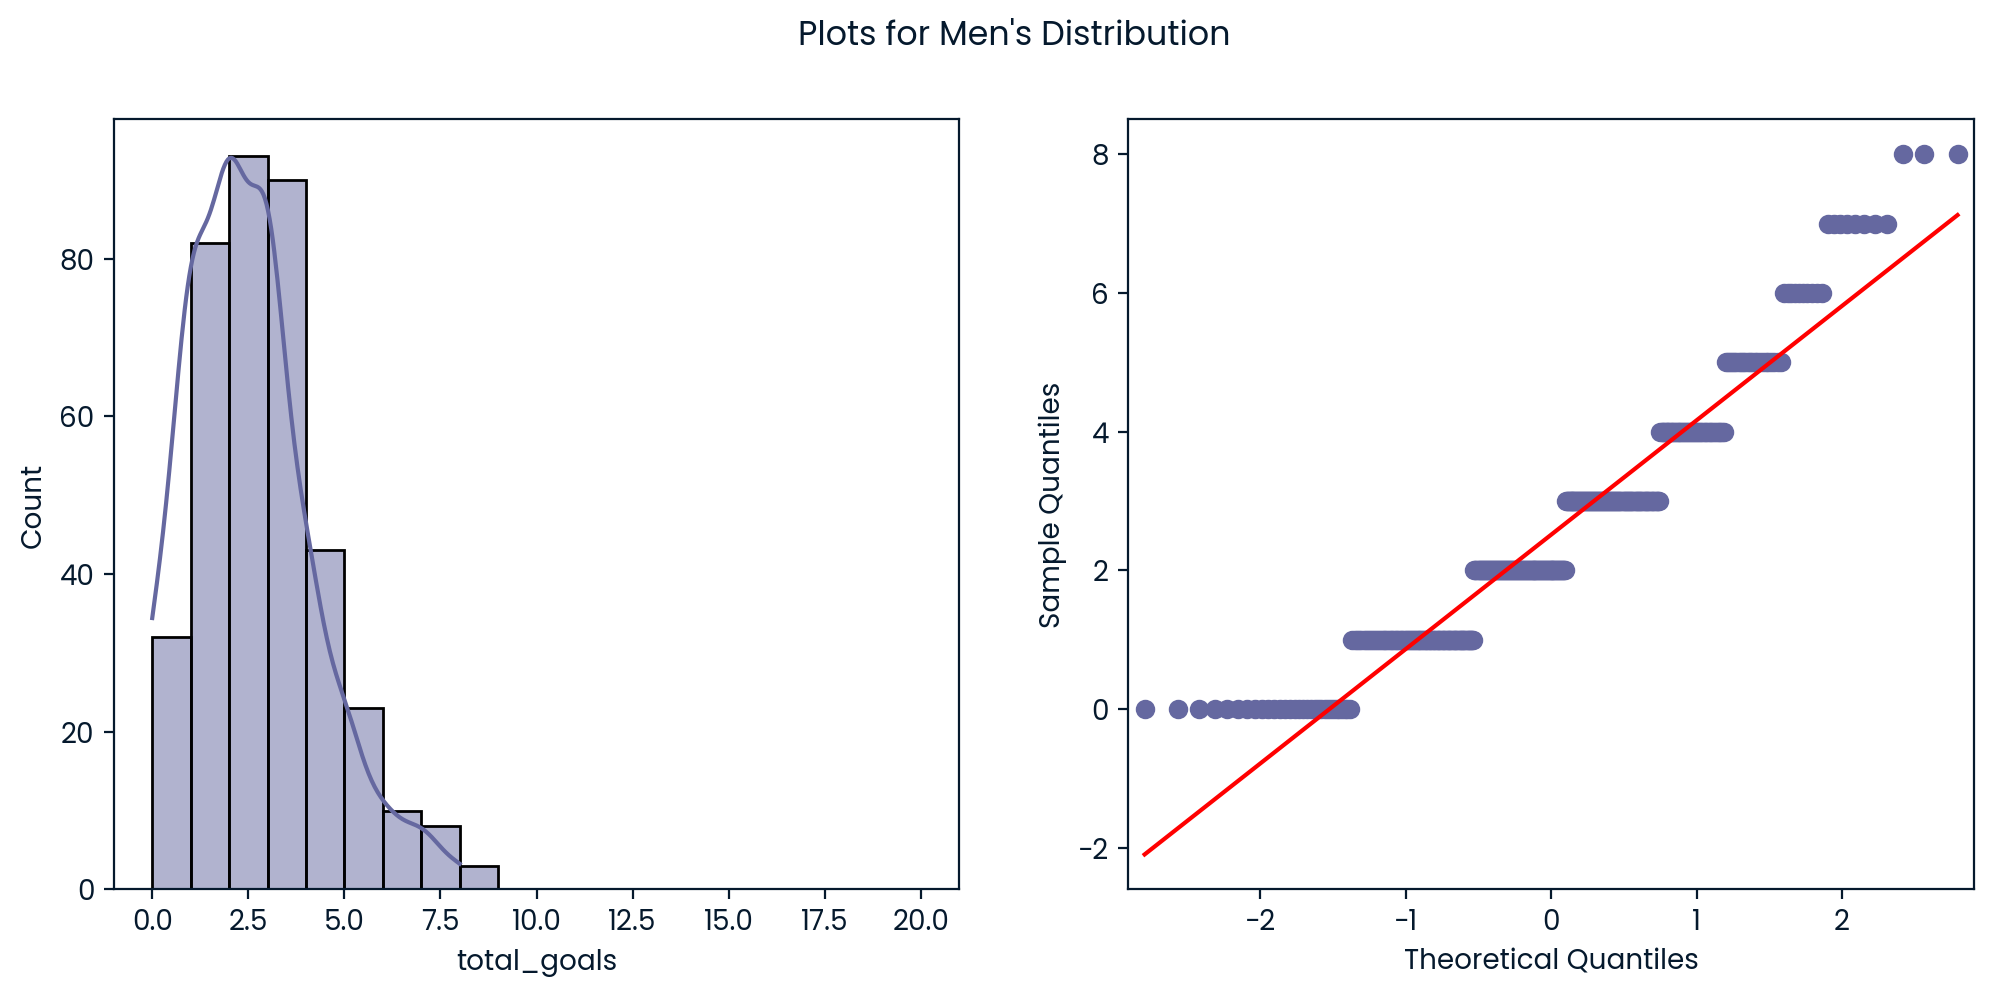

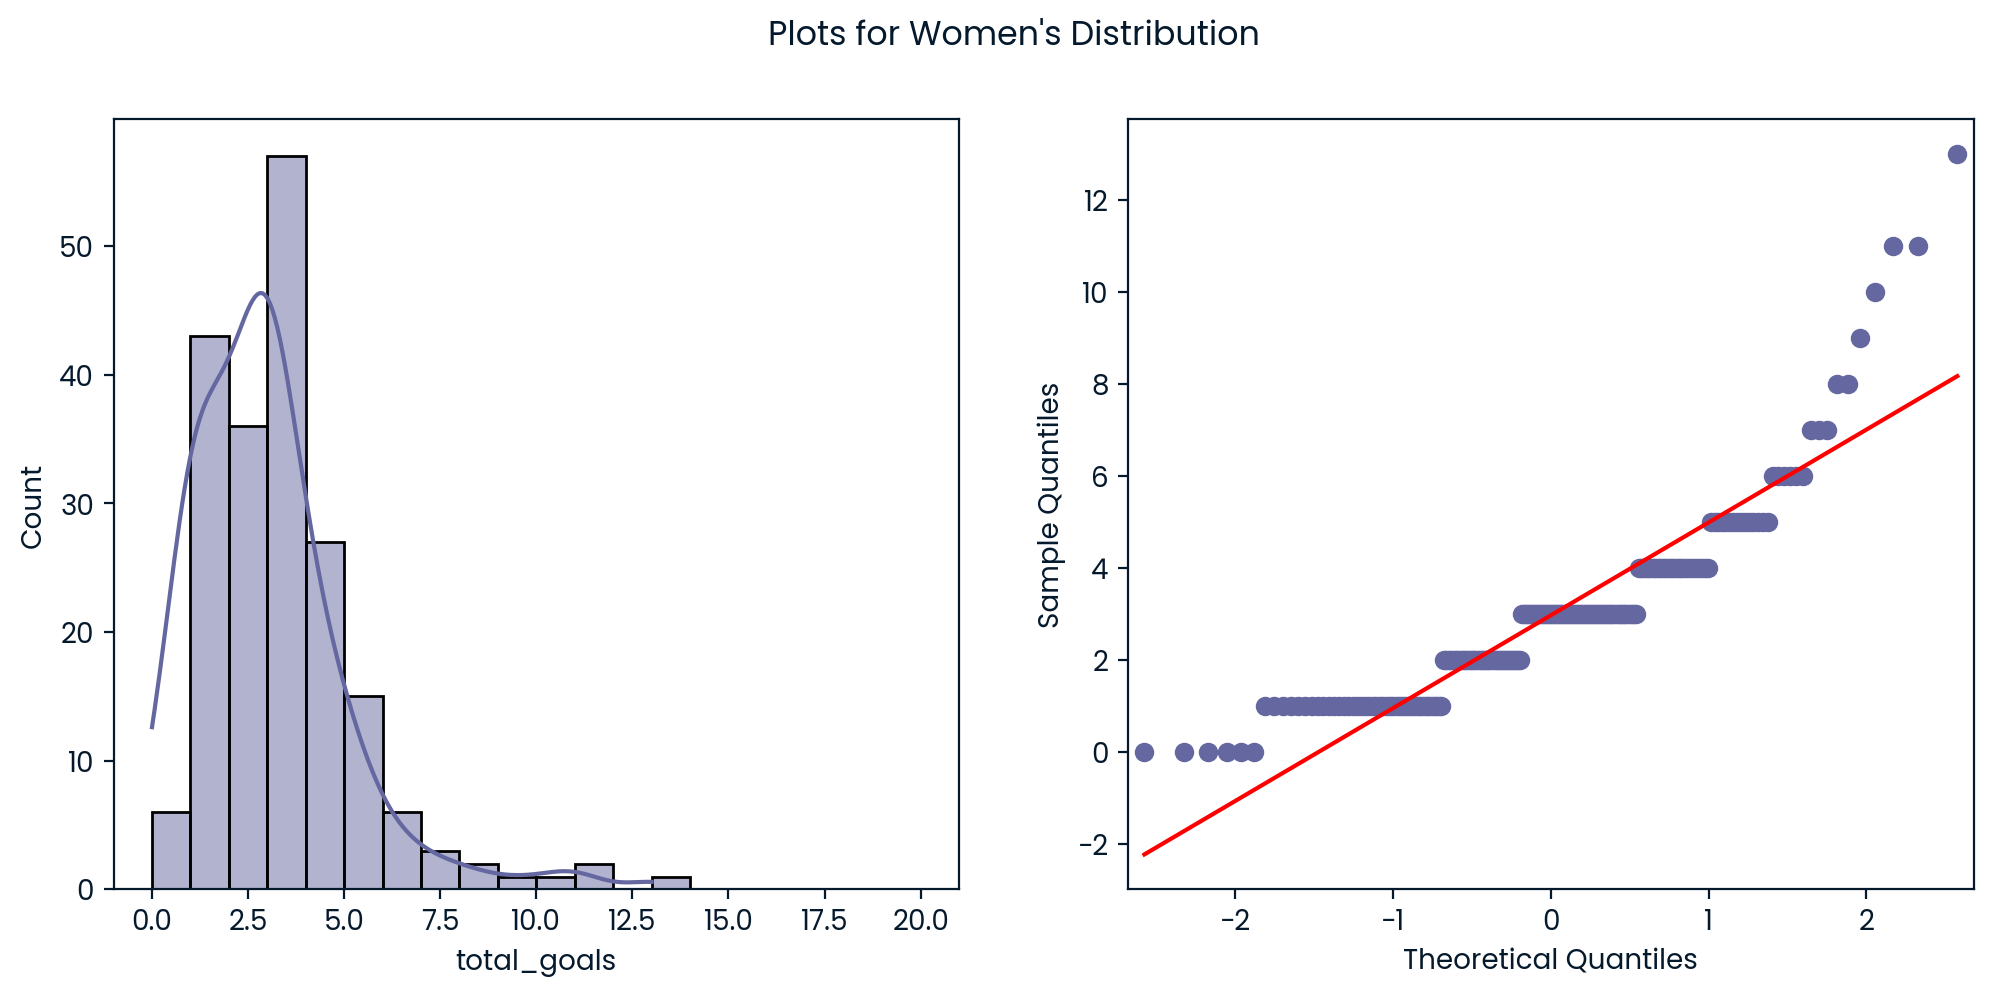

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

def plot_hist_qqplot(df, column_name, title_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

    sns.histplot(data=df, x=column_name, bins=np.arange(0, 21, 1), kde=True, ax=ax[0])
    qqplot(df[column_name], line='s', dist=stats.norm, ax=ax[1])
    fig.suptitle(title_name)  # Use suptitle to set the title for the entire figure
    plt.show()

plot_hist_qqplot(df_men_2002, 'total_goals', title_name="Plots for Men's Distribution")
plot_hist_qqplot(df_women_2002, 'total_goals', title_name="Plots for Women's Distribution")

The qq plots show both samples are not normally distributed. Therefore, need to do non-parametric tests and unpaired tests. mwu tests

In [198]:
import pingouin

df_men_2002["gender"] = "men"
df_women_2002["gender"] = "women"

df_men_women_2002 = pd.concat([df_men_2002, df_women_2002], axis = 0, ignore_index =True)
df_men_women_2002 = df_men_women_2002[['gender', 'total_goals']]

df_men_women_2002_wide = df_men_women_2002.pivot(columns = 'gender', 
                                            values = 'total_goals')

stats = pingouin.mwu(x= df_men_women_2002_wide["women"],
             y= df_men_women_2002_wide["men"],
             alternative = 'greater')

In [199]:
def result(p_val):
    if p_val <= 0.1:
        string = "reject"
    else:
        string = "fail to reject"
    return string
        
p_val = stats["p-val"][0]
result_dict = {
    "p_val" : p_val,
    "result": result(p_val)
}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
